## Import Libraries

In [2]:
import torch
import torchvision
import torchio as tio
import os
import random
import glob
import nibabel as nib
import numpy as np
import segmentation_models_pytorch as smp
import segmentation_models_pytorch_3d as smp3d
import matplotlib.pyplot as plt

C:\Users\wijflo\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Filter out problematic images

In [58]:
source_dir = "D:\\THROMBMICS-ALARMS_20240531\\SWI"
problem_dir = "D:\\THROMBMICS-ALARMS_20240531\\Problem_Images\\SWI"
prev = []
for file in os.listdir(source_dir):
    number = file.split("_")[1:2]
    # if file.split("_")[-1] == "ph.nii.gz":
    #     ph_q = True
    # else:
    #     ph_q = False
    if (number == prev):
        print(number)
        #os.rename(os.path.join(source_dir, file), os.path.join(problem_dir, file))
    prev = number

['06-10664-D0MR']
['09-10683-D0MR']
['09-10890-D0MR']
['16-10232-D0MR']
['21-10049-D0MR']
['21-10049-D0MR']


In [14]:
source_dir = "D:\\THROMBMICS-ALARMS_20240531\\TOF3D"
problem_dir = "D:\\THROMBMICS-ALARMS_20240531\\Problem_Images\\TOF3D"
prev = []
for file in os.listdir(source_dir):
    number = file.split("_")[1:2]
    if "_".join(file.split("_")[-2:]) == "Eq_1.nii.gz":
        eq1_q = True
    else:
        eq1_q = False
    if (number == prev) & (eq1_q):
        os.rename(os.path.join(source_dir, file), os.path.join(problem_dir, file))
    prev = number

In [42]:
swi_dir = "D:\\THROMBMICS-ALARMS_20240531\\SWI"
mask_dir = "D:\\THROMBMICS-ALARMS_20240531\\MASK"

swi_numbers = [file.split("_")[1:2][0] for file in os.listdir(swi_dir)]
mask_numbers = [file.split("_")[1:2][0] for file in os.listdir(mask_dir)]

diff = set(mask_numbers) - set(swi_numbers)

print(diff)

{'16-10170-D0MR', '02-10871-D0MR', '07-10333-D0MR', '14-10034-D0MR', '21-10163-D0MR', '21-10135-D0MR', '18-10428-D0MR', '01-10221-D0MR', '14-10119-D0MR', '14-10239-D0MR', '06-10750-D0MR', '05-10410-D0MR', '30-10034-D0MR', '18-10183-D0MR', '14-10164-D0MR', '30-10085-D0MR', '06-10487-D0MR', '14-10269-D0MR', '14-10115-D0MR', '18-10542-D0MR', '18-10099-D0MR', '06-10516-D0MR', '09-10890-D0MR', '21-10158-D0MR', '02-10874-D0MR', '30-10091-D0MR', '16-10168-D0MR', '30-10092-D0MR', '30-10090-D0MR', '06-10778-D0MR', '14-10156-D0MR', '02-10555-D0MR', '17-10120-D0MR', '16-10025-D0MR', '14-10172-D0MR', '02-10878-D0MR', '14-10068-D0MR', '06-10769-D0MR', '02-10722-D0MR', '14-10153-D0MR', '14-10238-D0MR', '30-10082-D0MR', '30-10083-D0MR', '07-10335-D0MR', '14-10120-D0MR', '30-10076-D0MR', '18-10396-D0MR', '14-10123-D0MR', '18-10206-D0MR', '14-10173-D0MR', '14-10087-D0MR', '21-10049-D0MR', '30-10088-D0MR', '14-10166-D0MR', '04-10442-D0MR', '14-10125-D0MR', '30-10094-D0MR', '14-10243-D0MR', '09-10674-D0M

In [57]:
source_dir = "E:\\Data_ETIS\\THROMBMICS-ALARMS_20240531"
target_dir = "E:\\Data_ETIS\\Temp"

for number in list(diff):
    for directory in glob.glob(os.path.join(source_dir, "2018-104_"+ number, "T2star_*")):
        for nii_file in os.listdir(directory):
            os.rename(os.path.join(directory, nii_file), os.path.join(target_dir, nii_file))
            print("Processed "+ nii_file)

Processed 2018-104_16-10170-D0MR_22_AX_T2_EG.nii.gz
Processed 2018-104_02-10871-D0MR_6_Ax_T2_GRE.nii.gz
Processed 2018-104_07-10333-D0MR_20_SWI_Images.nii.gz
Processed 2018-104_14-10034-D0MR_5_Ax_T2_.nii.gz
Processed 2018-104_21-10163-D0MR_401_cs_T2_FFE.nii.gz
Processed 2018-104_21-10135-D0MR_5_Ax_T2_.nii.gz
Processed 2018-104_18-10428-D0MR_11_T2_EG_AX.nii.gz
Processed 2018-104_01-10221-D0MR_11_SWI_Images.nii.gz
Processed 2018-104_14-10119-D0MR_16_T2_EG_AX.nii.gz
Processed 2018-104_14-10239-D0MR_5_Ax_T2_GRE_rapide.nii.gz
Processed 2018-104_06-10750-D0MR_8_AX_T2_EG_STD.nii.gz
Processed 2018-104_05-10410-D0MR_12_t2_fl2d_tra_4mm_hemo_te_25.nii.gz
Processed 2018-104_30-10034-D0MR_8_t2_fl2d_ax.nii.gz
Processed 2018-104_18-10183-D0MR_12_T2_EG_AX.nii.gz
Processed 2018-104_14-10164-D0MR_5_Ax_T2_GRE_rapide.nii.gz
Processed 2018-104_30-10085-D0MR_11_SWI_Images.nii.gz
Processed 2018-104_06-10487-D0MR_9_AX_T2_EG_STD.nii.gz
Processed 2018-104_14-10269-D0MR_16_AX_T2_.nii.gz
Processed 2018-104_14-101

## Separate Test Batch of Images

In [3]:
mask_train_dir = "D:\\data_ETIS_781\\Training\\Train_labels\\MASK_Train"
mask_test_dir = "D:\\data_ETIS_781\\Training\\Test_labels\\MASK_Test"
mask_val_dir = "D:\\data_ETIS_781\\Training\\Validation_labels\\MASK_Val"
swi_train_dir = "D:\\data_ETIS_781\\Training\\Train_dataset\\SWI_Train"
swi_test_dir = "D:\\data_ETIS_781\\Training\\Test_dataset\\SWI_Test"
swi_val_dir = "D:\\data_ETIS_781\\Training\\Validation_dataset\\SWI_Val"
tof_train_dir = "D:\\data_ETIS_781\\Training\\Train_dataset\\TOF3D_Train"
tof_test_dir = "D:\\data_ETIS_781\\Training\\Test_dataset\\TOF3D_Test"
tof_val_dir = "D:\\data_ETIS_781\\Training\\Validation_dataset\\TOF3D_Val"

In [14]:
def separate_image_batch(mask_source, mask_destination, swi_source, swi_destination, tof_source, tof_destination, batch_size, seed_value=777):
    # Separate three source folders, mask(labels), swi images, tof images into three other destination folders (e.g. validation or test),
    # sending the specified number of images selected randomly.
    random.seed(seed_value)
    batch_indexes = random.sample(range(len(os.listdir(mask_source))), batch_size)

    mask_file_list = [os.listdir(mask_source)[index] for index in batch_indexes]
    for file in mask_file_list:
        os.rename(os.path.join(mask_source, file), os.path.join(mask_destination, file))

    swi_file_list = [os.listdir(swi_source)[index] for index in batch_indexes]
    for file in swi_file_list:
        os.rename(os.path.join(swi_source, file), os.path.join(swi_destination, file))

    tof_file_list = [os.listdir(tof_source)[index] for index in batch_indexes]
    for file in tof_file_list:
        os.rename(os.path.join(tof_source, file), os.path.join(tof_destination, file))

Separate test.

In [15]:
separate_image_batch(mask_train_dir, mask_test_dir, swi_train_dir, swi_test_dir, tof_train_dir, tof_test_dir, 100, seed_value=777)

Separate validation.

In [16]:
separate_image_batch(mask_train_dir, mask_val_dir, swi_train_dir, swi_val_dir, tof_train_dir, tof_val_dir, 181, seed_value=777)

Clear out the training folders.

In [4]:
def clean_training_folders(mask_train_dir, mask_test_dir, mask_val_dir, swi_train_dir, swi_test_dir, swi_val_dir, tof_train_dir, tof_test_dir, tof_val_dir):
    # Remove files from training, validation and test folders of masks, swi images and tof images.
    folder_list = [mask_train_dir, mask_test_dir, mask_val_dir, swi_train_dir, swi_test_dir, swi_val_dir, tof_train_dir, tof_test_dir, tof_val_dir]
    for folders in folder_list:
        for file in os.listdir(folders):
            os.remove(os.path.join(folders, file))

In [5]:
clean_training_folders(mask_train_dir, mask_test_dir, mask_val_dir, swi_train_dir, swi_test_dir, swi_val_dir, tof_train_dir, tof_test_dir, tof_val_dir)

Fill training folders from processed images folder

In [10]:
def fill_training_folders(source_dir, mask_train_dir, swi_train_dir, tof_train_dir):
    # Send images from a source folder containing MASK, SWI and TOF3D folders to the training folders.
    for folders in os.listdir(source_dir):
        if (folders.split("_")[0] == "MASK") | (folders == "MASK"):
            for files in os.listdir(os.path.join(source_dir, folders)):
                os.rename(os.path.join(source_dir, folders, files), os.path.join(mask_train_dir,files))
        elif folders.split("_")[0] == "SWI":
            for files in os.listdir(os.path.join(source_dir, folders)):
                os.rename(os.path.join(source_dir, folders, files), os.path.join(swi_train_dir,files))
        elif folders.split("_")[0] == "TOF3D":
            for files in os.listdir(os.path.join(source_dir, folders)):
                os.rename(os.path.join(source_dir, folders, files), os.path.join(tof_train_dir,files))

In [13]:
source_dir = "D:\\data_ETIS_781\\Resized"

fill_training_folders(source_dir, mask_train_dir, swi_train_dir, tof_train_dir)

## Helper Functions

In [205]:
def remove_padding_2D(slice_tensor, original_height, original_width):
    # Remove padding from a 2D tensor, returning it to specified dimensions. The padding is removed from the right and from the bottom.
    return slice_tensor[:original_height, :original_height]

def remove_padding_from_tensor(tensor, original_height, original_width):
    # Apply the padding removal function to the tensor and restack the slices to form 3D images.
    unpadded_slices = []

    for i in range(tensor.shape[0]):
        unpadded_slice=[]
        for j in range(tensor.shape[3]):
            slice_tensor = tensor[i, :, :, j]
            unpadded_slice.append(remove_padding(slice_tensor, original_height, original_width))
        unpadded_slices.append(torch.stack(unpadded_slice))

    return torch.stack(unpadded_slices).permute(0,2,3,1)

def logit_to_binary_mask(tensor, threshold=0.5):
    # Transform a tensor of logits into a binary mask according to the specified probability threshold.
    mask_tensor = torch.sigmoid(tensor)

    return (mask_tensor >= threshold).float()

def save_checkpoint(model, optimizer, epoch, loss, filepath):
    # Saves a checkpoint of a PyTorch model.
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss
    }
    torch.save(checkpoint, filepath)

def save_array_to_nifti1(array, original_img, destination_path, output_name):
    # Transform the array to a nifti image which requires the affine of the original image.
    processed_img = nib.Nifti1Image(array, original_img.affine)
    nib.save(processed_img, os.path.join(destination_path, output_name))

## Use segmentation models 3d

### Dataset setup

In [38]:
class BasicImageDataset3D(torch.utils.data.Dataset):
    # PyTorch class used to read 3D image data and structure it into a tensor of double-channeled images and a tensor of binary mask labels.
    def __init__(self, img_dir, label_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.label_dir = label_dir
        self.transform = transform
        self.target_transform = target_transform
        self.img_path_list = [[os.path.join(path, img) for img in files if img.endswith(".nii.gz")]
                         for path, dirs, files in os.walk(self.img_dir) if path != self.img_dir]
        self.label_path_list = [mask for mask in os.listdir(self.label_dir) if mask.endswith(".nii.gz")]

    def __len__(self):
        return len(self.label_path_list)

    def __getitem__(self, idx):
        image = np.array([nib.load(img[idx]).get_fdata() for img in self.img_path_list])
        label = nib.load(os.path.join(self.label_dir, self.label_path_list[idx])).get_fdata()

        image = torch.tensor(image, dtype=torch.float32)
        label = torch.tensor(label, dtype=torch.float32)
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [39]:
train_dir = "D:\\data_ETIS_781\\Training\\Train_dataset\\"
val_dir = "D:\\data_ETIS_781\\Training\\Validation_dataset"
train_label_dir = "D:\\data_ETIS_781\\Training\\Train_labels\\MASK_Train"
val_label_dir = "D:\\data_ETIS_781\\Training\\Validation_labels\\MASK_Val"

In [40]:
class PadToMultipleofN3D(object):
    # A transform called by the dataset class, used to pad a 3D image to the closest multiple of a specified integer N (referred as multiple_n hereafter).
    def __init__(self, multiple_n):
        self.multiple_n = multiple_n
    
    def __call__(self, img):
        # Take the last 3 dimensions as height, width and depth. Allows the class to be generalized to images with 1 or multiple channels.
        height, width, depth = img.shape[-3:]
        pad_height = (self.multiple_n - height % self.multiple_n) % self.multiple_n
        pad_width = (self.multiple_n - width % self.multiple_n) % self.multiple_n
        pad_depth = (self.multiple_n - depth % self.multiple_n) % self.multiple_n

        padding = (0, pad_depth, 0, pad_height, 0, pad_width)

        padded_img = torch.nn.functional.pad(img, padding, mode="constant", value=0)
        return padded_img

### Use the BasicImageDataset class

In [41]:
train_dataset = BasicImageDataset3D(train_dir, train_label_dir, transform=PadToMultipleofN3D(32), target_transform=PadToMultipleofN3D(32))
val_dataset = BasicImageDataset3D(val_dir, val_label_dir, transform=PadToMultipleofN3D(32), target_transform=PadToMultipleofN3D(32))

In [42]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=False)

### Use the SubjectsDataset class from torchio

Create a mask that labels empty space (0), brain (1) and thrombus (2).

In [32]:
def load_subjectsdataset (swi_dir, tof_dir, labels_dir, **kwargs):
    subjects_list = []
    swi_list = os.listdir(swi_dir)
    tof_list = os.listdir(tof_dir)
    labels_list = os.listdir(labels_dir)
    
    if len(swi_list) != len(tof_list) != len(labels_list):
        print("Mismatch in sample numbers")
    
    for swi_file, tof_file, label_file in zip(swi_list, tof_list, labels_list):
        subject = tio.Subject(
            swi_image=tio.ScalarImage(os.path.join(swi_dir, swi_file)),
            tof_image=tio.ScalarImage(os.path.join(tof_dir, tof_file)),
            label = tio.LabelMap(os.path.join(labels_dir, label_file)),
            subject_number = "_".join(swi_file.split("_")[:2])
        )
        subjects_list.append(subject)
    
    return tio.SubjectsDataset(subjects_list, **kwargs)

In [33]:
swi_dir = "D:\\data_ETIS_781\\Training\\Torchio_train\\SWI_Train"
tof_dir = "D:\\data_ETIS_781\\Training\\Torchio_train\\TOF3D_Train"
labels_dir = "D:\\data_ETIS_781\\Training\\Torchio_labels\\MASK_Train"

In [45]:
tio_dataset = load_subjectsdataset(swi_dir, tof_dir, labels_dir, transform=tio.transforms.EnsureShapeMultiple(32, method="pad"))

In [48]:
tio_dataset[1].label

LabelMap(shape: (1, 768, 768, 96); spacing: (0.30, 0.30, 1.50); orientation: RAS+; dtype: torch.IntTensor; memory: 216.0 MiB)

In [44]:
tio_dataset[1].swi_image

ScalarImage(shape: (1, 768, 768, 90); spacing: (0.30, 0.30, 1.50); orientation: RAS+; dtype: torch.FloatTensor; memory: 202.5 MiB)

### Training Loop

In [43]:
model = smp3d.UnetPlusPlus(encoder_name="resnext50_32x4d", encoder_weights="imagenet", in_channels=2, classes=2)

In [44]:
dice_loss = smp3d.losses.DiceLoss("binary", from_logits=False, smooth=1)

In [45]:
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [46]:
num_epochs = 20

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)

for epoch in range(num_epochs):
    model.train()
    for images, gt_masks in train_dataloader:
        images, gt_masks = images.to(device), gt_masks.to(device)
        
        optimizer.zero_grad()
        predicted_mask = model(images)
        loss = dice_loss(predicted_mask, gt_masks)
        ## Average the predictions in each channel
        predicted_mask = predicted_mask.mean(dim=1)
        # Transform prediction logits to probabilities
        predicted_mask = torch.sigmoid(predicted_mask)
        loss.backward()
        optimizer.step()

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for images, gt_masks in val_dataloader:
            images, gt_masks = images.to(device), gt_masks.to(device)
            
            predicted_mask = model(images)
            ## Average the predictions in each channel
            predicted_mask = predicted_mask.mean(dim=1)
            # Transform prediction logits to probabilities
            predicted_mask = torch.sigmoid(predicted_mask)
            loss = dice_loss(predicted_mask, gt_masks)
            val_loss += loss.item()

    val_loss /= len(val_dataloader)
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}")

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


## Use pytorch segmentation models slice-by-slice

### Dataset setup

In [165]:
class BasicImageDataset2D(torch.utils.data.Dataset):
    # PyTorch class used to read 3D image data and structure it into a tensor of double-channeled 2D slices and a tensor of binary mask labels.
    def __init__(self, img_dir, label_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.label_dir = label_dir
        self.transform = transform
        self.target_transform = target_transform
        self.img_path_list = [[os.path.join(path, img) for img in files if img.endswith(".nii.gz")]
                         for path, dirs, files in os.walk(self.img_dir) if path != self.img_dir]
        self.label_path_list = [mask for mask in os.listdir(self.label_dir) if mask.endswith(".nii.gz")]
        ## Assume all images have same dimensions by retrieving the dimensions of first image only.
        self.img_depth = nib.load(os.path.join(self.label_dir, self.label_path_list[0])).shape[2] 

    def __len__(self):
        return (len(self.label_path_list) * self.img_depth)

    def __getitem__(self, idx):
        img_idx = idx // self.img_depth
        slice_idx = idx % self.img_depth
        img_slice = np.array([nib.load(img[img_idx]).get_fdata()[:,:,slice_idx] for img in self.img_path_list])
        label_slice = nib.load(os.path.join(self.label_dir, self.label_path_list[img_idx])).get_fdata()[:,:,slice_idx]

        img_slice = torch.tensor(img_slice, dtype=torch.float32)
        label_slice = torch.tensor(label_slice, dtype=torch.float32)
        if self.transform:
            img_slice = self.transform(img_slice)
        if self.target_transform:
            label_slice = self.target_transform(label_slice)
        return img_slice, label_slice

In [166]:
train_dir = "D:\\data_ETIS_781\\Training\\Train_dataset\\"
val_dir = "D:\\data_ETIS_781\\Training\\Validation_dataset"
train_label_dir = "D:\\data_ETIS_781\\Training\\Train_labels\\MASK_Train"
val_label_dir = "D:\\data_ETIS_781\\Training\\Validation_labels\\MASK_Val"

In [167]:
class PadToMultipleofN2D(object):
    # A transform called by the dataset class, used to pad a 2D image to the closest multiple of a specified integer N (referred as multiple_n hereafter).
    def __init__(self, multiple_n):
        self.multiple_n = multiple_n
    
    def __call__(self, img):
        # Take the last 2 dimensions as height and width. Allows the class to be generalized to images with 1 or multiple channels.
        height, width = img.shape[-2:]
        pad_height = (self.multiple_n - height % self.multiple_n) % self.multiple_n
        pad_width = (self.multiple_n - width % self.multiple_n) % self.multiple_n

        padding = (0, pad_height, 0, pad_width)

        padded_img = torch.nn.functional.pad(img, padding, mode="constant", value=0)
        return padded_img

In [168]:
train_dataset = BasicImageDataset2D(train_dir, train_label_dir, transform=PadToMultipleofN2D(32), target_transform=PadToMultipleofN2D(32))
val_dataset = BasicImageDataset2D(val_dir, val_label_dir, transform=PadToMultipleofN2D(32), target_transform=PadToMultipleofN2D(32))

In [179]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=50, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=50, shuffle=False)

### Training Loop Slice-by-slice

In [220]:
model = smp.UnetPlusPlus(encoder_name="resnext50_32x4d", encoder_weights="imagenet", in_channels=2, classes=2)

In [219]:
dice_loss = smp.losses.DiceLoss("binary", from_logits=False, smooth=1)
focal_loss = smp.losses.FocalLoss("binary", alpha=0.75, gamma=2, normalized=True)

In [221]:
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [222]:
num_epochs = 20

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for images, gt_masks in train_dataloader:
        images, gt_masks = images.to(device), gt_masks.to(device)
        
        optimizer.zero_grad()
        predicted_mask = model(images)
        # Average the predictions in each channel
        predicted_mask = predicted_mask.mean(dim=1)
        # Transform prediction logits to probabilities
        #predicted_mask = torch.sigmoid(predicted_mask)
        loss = focal_loss(predicted_mask, gt_masks)
        loss.backward()

        for name, param in model.named_parameters():
            if param.grad is not None:
                pass
                #print(f"{name} gradient: {param.grad.norm().item()}")
            else:
                print(f"{name} has no gradient")
        
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_dataloader)
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss:.4f}")
    
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for images, gt_masks in val_dataloader:
            images, gt_masks = images.to(device), gt_masks.to(device)
            
            predicted_mask = model(images)
            # Average the predictions in each channel
            predicted_mask = predicted_mask.mean(dim=1)
            # Transform prediction logits to probabilities
            #predicted_mask = torch.sigmoid(predicted_mask)
            loss = focal_loss(predicted_mask, gt_masks)
            val_loss += loss.item()

    val_loss /= len(val_dataloader)
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}")
    save_checkpoint(model, optimizer, epoch, loss, 'D:\\data_ETIS_781\\Training\\Checkpoints\\downsampled_1p5_2p2_checkpoint.pth')

Epoch 1/20, Training Loss: 0.0000
Epoch 1/20, Validation Loss: 0.0000
Epoch 2/20, Training Loss: 0.0000
Epoch 2/20, Validation Loss: 0.0000
Epoch 3/20, Training Loss: 0.0000
Epoch 3/20, Validation Loss: 0.0000
Epoch 4/20, Training Loss: 0.0000
Epoch 4/20, Validation Loss: 0.0000
Epoch 5/20, Training Loss: 0.0000
Epoch 5/20, Validation Loss: 0.0000
Epoch 6/20, Training Loss: 0.0000
Epoch 6/20, Validation Loss: 0.0000
Epoch 7/20, Training Loss: 0.0000
Epoch 7/20, Validation Loss: 0.0000
Epoch 8/20, Training Loss: 0.0000
Epoch 8/20, Validation Loss: 0.0000
Epoch 9/20, Training Loss: 0.0000
Epoch 9/20, Validation Loss: 0.0000
Epoch 10/20, Training Loss: 0.0000
Epoch 10/20, Validation Loss: 0.0000
Epoch 11/20, Training Loss: 0.0000
Epoch 11/20, Validation Loss: 0.0000
Epoch 12/20, Training Loss: 0.0000
Epoch 12/20, Validation Loss: 0.0000


KeyboardInterrupt: 

## Load model and predict

In [223]:
model_for_prediction = smp.UnetPlusPlus(encoder_name="resnext50_32x4d", encoder_weights="imagenet", in_channels=2, classes=2)

In [224]:
learning_rate = 0.01
optimizer_for_prediction = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [225]:
model_for_prediction_checkpoint = torch.load('D:\\data_ETIS_781\\Training\\Checkpoints\\downsampled_1p5_2p2_checkpoint.pth')

In [193]:
model_for_prediction.load_state_dict(model_for_prediction_checkpoint["model_state_dict"])
optimizer_for_prediction.load_state_dict(model_for_prediction_checkpoint['optimizer_state_dict'])

In [226]:
test_dir = "D:\\data_ETIS_781\\Training\\Validation_dataset\\"
test_label_dir = "D:\\data_ETIS_781\\Training\\Validation_labels\\MASK_Val"

In [227]:
test_dataset = BasicImageDataset2D(test_dir, test_label_dir, transform=PadToMultipleofN2D(32), target_transform=PadToMultipleofN2D(32))

In [228]:
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=50, shuffle=False)

In [229]:
model.eval()

all_predictions_mean = []
all_predictions_first = []

with torch.no_grad():
    for images, test_labels in test_dataloader:
        images = images.to(device)
        predicted_mask_test = model(images)

        predicted_mask_test_mean = predicted_mask_test.mean(dim=1)
        predicted_mask_test_first = predicted_mask_test[:,0,:,:]

        all_predictions_mean.append(predicted_mask_test_mean.cpu())
        all_predictions_first.append(predicted_mask_test_first.cpu())
        
        

In [230]:
padded_width = 160
padded_height = 160
depth = 62
test_sample_size = 181

In [231]:
all_predictions_mean_images = torch.cat(all_predictions_mean, dim=0).permute(1,2,0).reshape(test_sample_size,padded_width,padded_height,depth)

In [232]:
all_predictions_first_images = torch.cat(all_predictions_first, dim=0).permute(1,2,0).reshape(test_sample_size,padded_width,padded_height,depth)

In [233]:
original_height = 154
original_width = 154

In [234]:
all_predictions_mean_images = remove_padding_from_tensor(all_predictions_mean_images, original_height, original_width)

In [235]:
all_predictions_first_images = remove_padding_from_tensor(all_predictions_first_images, original_height, original_width)

In [236]:
reference_filepath = "D:\\data_ETIS_781\\Training\\Test_labels\\MASK_Test\\2018-104_01-10113-D0MR_S9_202312051300_Resized_Tours-THROMBMICS-Clot-Segmentation_Downsampled.nii.gz"
reference_image = nib.load(reference_filepath)

In [268]:
test_labels_dir = "D:\\data_ETIS_781\\Training\\Validation_labels\\MASK_Val"

all_predictions_mean_masks = np.array(logit_to_binary_mask(all_predictions_mean_images, threshold=0.1))

for mask_array, mask_filename in zip(all_predictions_mean_masks, os.listdir(test_labels_dir)):
    split_filename = mask_filename.split(".")
    split_filename[0] = split_filename[0] + "_MeanPrediction"
    final_filename = ".".join(split_filename)
    save_array_to_nifti1(mask_array, reference_image, "D:\\data_ETIS_781\\Training\\Predictions\\Validation_Predictions\\Mean_Predictions", final_filename)

del(all_predictions_mean_masks)

In [269]:
test_labels_dir = "D:\\data_ETIS_781\\Training\\Validation_labels\\MASK_Val"

all_predictions_first_masks = np.array(logit_to_binary_mask(all_predictions_first_images, threshold=0.1))

for mask_array, mask_filename in zip(all_predictions_first_masks, os.listdir(test_labels_dir)):
    split_filename = mask_filename.split(".")
    split_filename[0] = split_filename[0] + "_SWIPrediction"
    final_filename = ".".join(split_filename)
    save_array_to_nifti1(mask_array, reference_image, "D:\\data_ETIS_781\\Training\\Predictions\\Validation_Predictions\\SWI_Predictions", final_filename)

del(all_predictions_first_masks)

In [240]:
all_predictions_mean_images.shape

torch.Size([181, 154, 154, 62])

In [304]:
predictions_mean_sum = torch.sum(logit_to_binary_mask(all_predictions_mean_images, threshold=0.3), dim=(1,2,3))
predictions_first_sum = torch.sum(logit_to_binary_mask(all_predictions_first_images, threshold=0.3), dim=(1,2,3))

In [307]:
160*160*62

1587200

In [305]:
predictions_mean_sum

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  4., 10.,  6., 12., 13.,  4.,
         7., 22., 23., 16., 24., 15.,  7., 18.,  6., 23., 27., 27., 15.,  4.,
         9.,  9.,  1.,  6.,  7.,  5.,  3.,  2.,  3.,  1.,  3.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.,  3.,  7.,  0.,  4.,  6., 10.,  5., 14., 19., 26.,
         7., 14., 10., 18., 25., 26., 12.,  7.,  4.,  9., 10., 16., 12.,  8.,
         7.,  5.,  4.,  0.,  5.,  5.,  4.,  5.,  3.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  

In [306]:
predictions_first_sum

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.,  1.,  0.,  1.,  5.,  6., 21., 11., 19., 15., 11.,
        16., 36., 32., 26., 38., 28., 24., 28., 15., 38., 41., 41., 26., 14.,
        14., 12.,  1.,  9., 15.,  6., 10.,  6.,  7.,  5.,  7.,  1.,  2.,  2.,
         2.,  1.,  0.,  5.,  4.,  9.,  0.,  9.,  9., 15., 10., 18., 35., 26.,
         9., 18., 19., 29., 39., 37., 22., 13.,  6.,  9., 15., 17., 13., 12.,
        22., 12., 13.,  2.,  7.,  8.,  6.,  7.,  4.,  1.,  0.,  2.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  

In [303]:
torch.sum(val_extracted_labels, dim=(1,2,3))

tensor([ 1.,  0.,  1.,  3.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  5.,
         3.,  0.,  1., 11.,  5.,  0.,  0.,  4.,  1.,  0.,  0.,  0.,  7.,  0.,
         2.,  2.,  1.,  0.,  6.,  0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,
        21.,  0.,  3.,  0.,  4.,  3.,  0.,  5.,  0.,  6.,  0.,  1.,  0.,  0.,
         0., 21.,  2.,  1.,  0.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  3.,  2.,  0.,  2., 14., 16.,  6.,  2.,  0.,  0., 13., 14.,
         0.,  1.,  0.,  5.,  1.,  2.,  4.,  0., 40.,  2., 26., 12.,  0., 19.,
         1., 13., 13., 45., 56., 13., 12.,  8.,  0.,  1.,  7.,  3.,  4.,  0.,
         0.,  0.,  3.,  0.,  0.,  4.,  3.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,
         2., 19.,  8.,  0.,  0.,  0., 13.,  0.,  6.,  3.,  0.,  0., 10.,  0.,
         0.,  0.,  0.,  0., 19.,  0., 29.,  4.,  1.,  6.,  1.,  8., 13.,  0.,
         4.,  0.,  0., 15.,  2.,  3.,  0.,  0., 26.,  1., 12., 1

In [284]:
os.listdir("D:\\data_ETIS_781\\Training\\Predictions\\Validation_Predictions\\SWI_Predictions")[62]

'2018-104_05-10382-D0MR_S301_202312051300_Resized_Tours-THROMBMICS-Clot-Segmentation_Downsampled_SWIPrediction.nii.gz'

In [291]:
val_extracted_labels = [val_dataset[i][1] for i in range(len(val_dataset))]

In [299]:
val_extracted_labels = torch.tensor(np.array(val_extracted_labels))

In [302]:
val_extracted_labels = val_extracted_labels.reshape(181,160,160,62)

In [266]:
mean_histogram = torch.flatten(torch.sigmoid(all_predictions_mean_images))
swi_histogram = torch.flatten(torch.sigmoid(all_predictions_first_images))

(0.0, 1000.0)

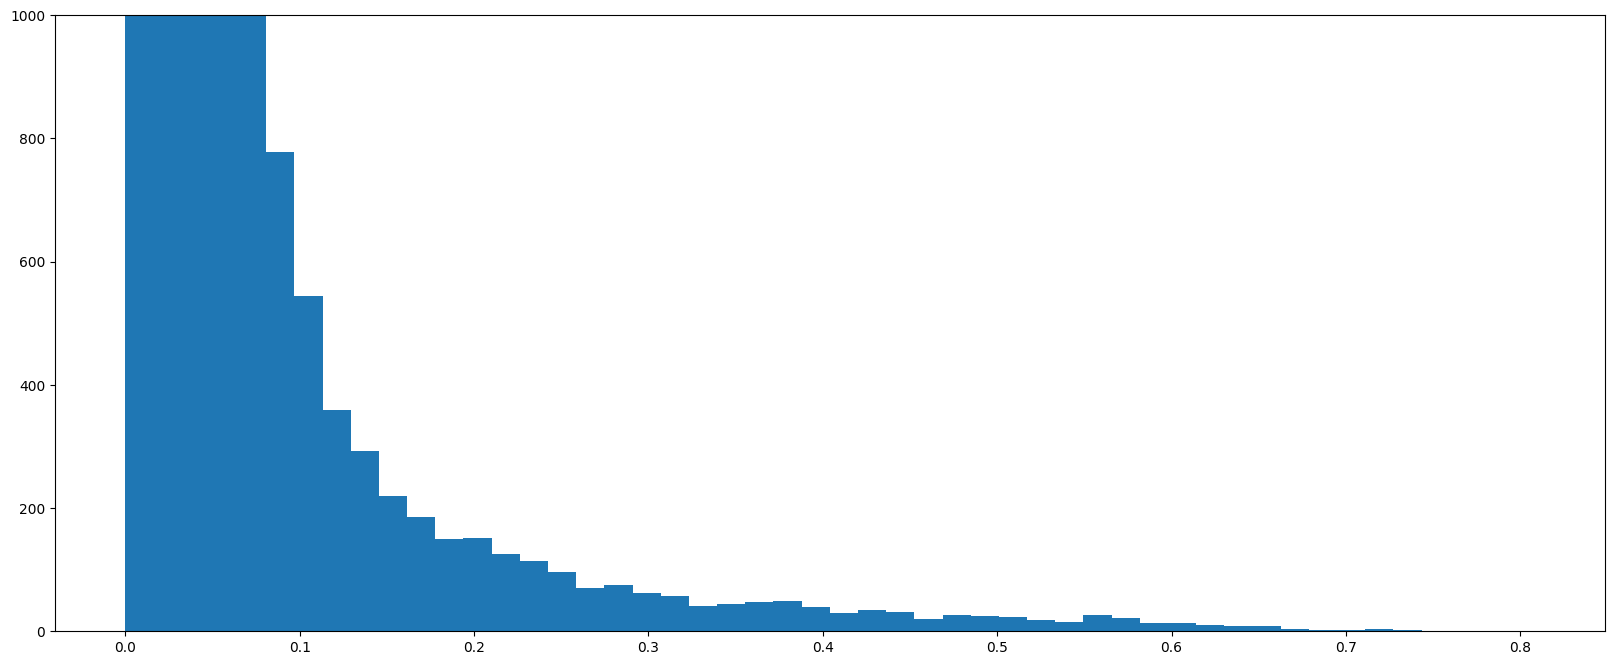

In [265]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.hist(mean_histogram.numpy(),bins=50)
ax.set_ylim(0,1000)

(0.0, 1000.0)

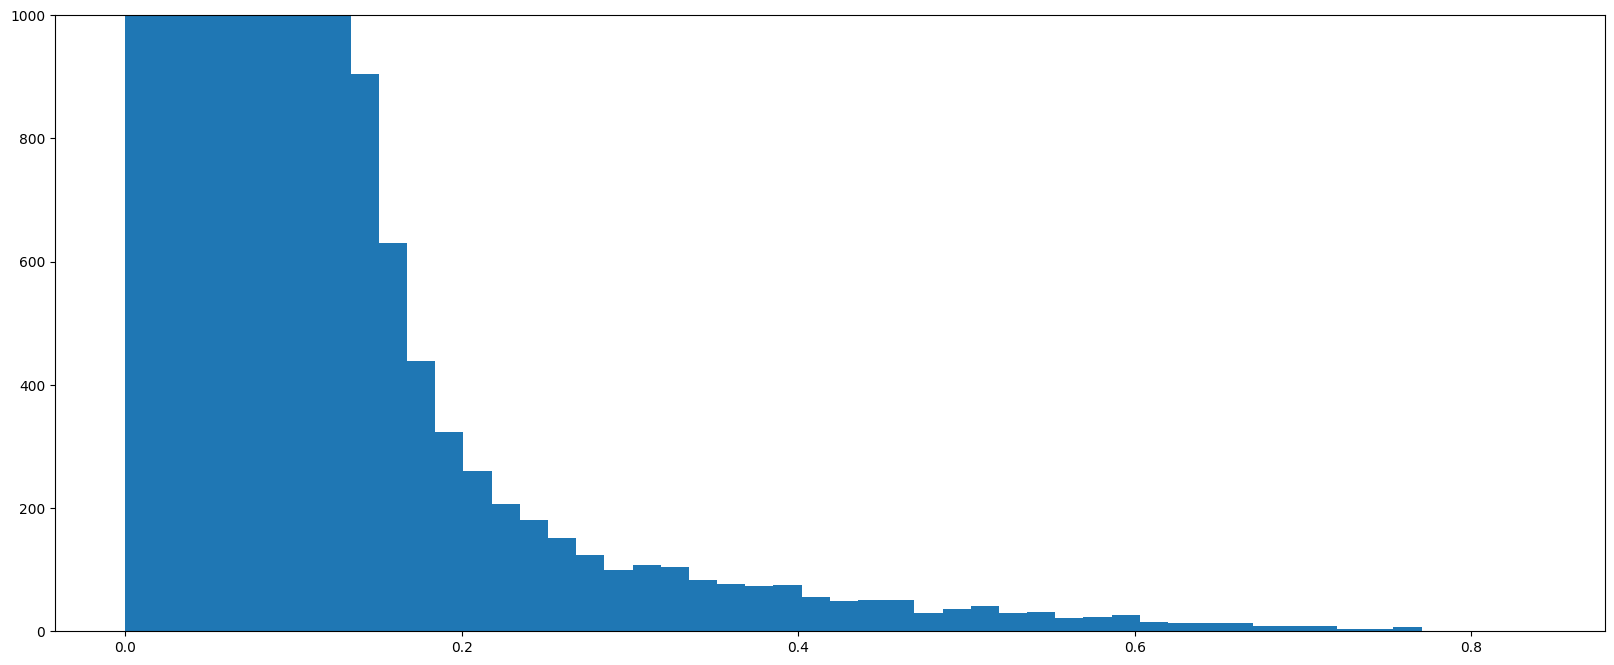

In [267]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.hist(swi_histogram.numpy(),bins=50)
ax.set_ylim(0,1000)

## Testing ground

In [218]:
img, label = val_dataset